In [1]:
import hierarchical_genomes as hg
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Genome Example and Network Visualization


In [2]:
# Define a simple genome
# a connection gene is of the from [from_node, to_node, weight]
# A genome consists of nested lists where the lowest level of any branch of the nested lists
# is a connection gene.

# Define a simple genome 
# with 3 nodes (given by the largest node number in the genome)
# three connections (given by the number of connection genes)
# the first two connections genes share the same weight, the third has a smaller weight. This will be shown in the graph visualization
genome = [[0,1,0.5],[1,2,0.5],[2,3,0.1]]

# Transcribe the genome into a weight matrix
weight_matrix = hg.transcribe_hierarchical_genome_to_weight_matrix(genome)
print(weight_matrix)


[[0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.1]
 [0.  0.  0.  0. ]]


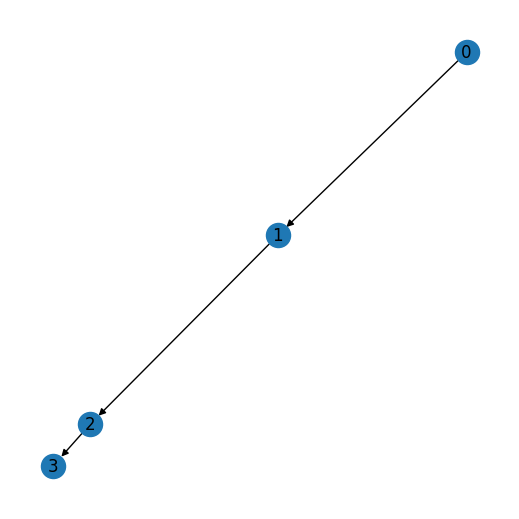

In [3]:
# Use networkx to visualize the genome
# First the weight matrix is converted into a networkx graph
graph = nx.from_numpy_array(weight_matrix, create_using=nx.DiGraph)

# Then the graph is visualized
figure = plt.figure(figsize=(5,5))

# The layout is chosen to be the kamada kawai layout, this is a force directed graph
# Its good to visualize changes in the graph produced by the genome's evolution as 
# the nodes generally stay at the same location in the graph
nx.draw_kamada_kawai(graph, with_labels=True)

# Undirected Evolution Example

Here we simple mutate the original genome over a few generations so that the we can get an intuition for how the mutation operations changes the underlying network.

In [7]:
# Setup the number of generations to evolve the genome
n_generations = 50

# Define the starting genome
genome = [[0,1,0.5],[1,2,0.5],[2,3,0.5]]

# Transcribe the first genome into a weight matrix for later visualization
weight_matrix = hg.transcribe_hierarchical_genome_to_weight_matrix(genome)

# Setup lists to store the weight matrices and mutation history
weight_matrices = [weight_matrix]
mutation_history = ["initial"]

# Mutate the genome for n_generations
for generation in range(n_generations):
    genome, mutation = hg.mutate_genome_with_hox(genome)

    mutation_history.append(mutation)

    weight_matrix = hg.transcribe_hierarchical_genome_to_weight_matrix(genome)
    weight_matrices.append(weight_matrix)
    


Hox copy
Hox remove
Hox group
Hox group
Hox copy
Hox copy
Hox copy
Mutate Connection
Hox remove
Mutate Connection
Remove Node
Add connection
Mutate Connection
Hox remove
Hox group
Add Node
Mutated Weight
Hox remove
Hox group
 Hox Shuffle
[12, 13, 0.5]
Mutated Weight
Mutate Connection
Add Node
Mutated Weight
Add Node
Hox remove
Hox remove
Mutated Weight
Hox group
Mutated Weight
Hox remove
Hox copy
Mutated Weight
 Hox Shuffle
[3, 9, 0.03738896362022906]
Mutated Weight
Hox remove
Hox remove
 Hox Shuffle
[18, 24, 0.03738896362022906]
Add connection
Hox copy
Mutated Weight
 Hox Shuffle
[18, 55, 0.003215718641993548]
Mutated Weight
 Hox Shuffle
[20, 31, -0.2202078893256639]
Mutate Connection
Hox remove
Mutated Weight
Mutated Weight
Remove Node
Mutated Weight


## Visualize the mutation history of the Genome

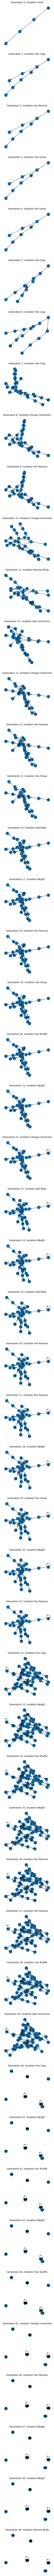

In [8]:

fig, ax = plt.subplots(n_generations,1, figsize=(5,n_generations*5))

for generation in range(n_generations):
    weight_matrix = weight_matrices[generation]
    weight_matrix = np.abs(weight_matrix)
    
    if len(weight_matrix.shape) == 2:
        # Add 1 to all non-zero weights to make the visualization nicer
        weight_matrix += weight_matrix != 0

        graph = nx.from_numpy_array(weight_matrix, create_using=nx.DiGraph)
        nx.draw_kamada_kawai(graph, ax=ax[generation], with_labels=True)
        ax[generation].set_title(f"Generation {generation}, mutation {mutation_history[generation]}")
plt.show()